# Imports

In [130]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
import matplotlib.patches as mpatches

# Functions

In [131]:
def bench_k_means(estimator, name, data, labels, sample_size):
    t0 = time()
    estimator.fit(data)
    
        
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1],(time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))


# Put the result into a color plot
def PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, lege, legeHandle):
    #labelOut = kmeans.labels_
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    # separated cluster areas
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    #plt.colorbar()
    if (lege == True):
        plt.legend(handles=legeHandle)
    #    plt.legend(['test1','test2','test3','test4'])
    # individual datapoints
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    # cluster centers
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

def PrepClusters(h, reduced_data, n_digits, kmeans):
    kmeans.fit(reduced_data)
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    return(xx, yy, Z, x_min, x_max, y_min, y_max)

In [132]:
# Loads the datasets
wine = pd.read_csv('newWine.csv')
mushrooms = pd.read_csv('newMushroom.csv')
print(mushrooms.isnull().sum())
print(wine.isnull().sum())
#wine = wine.dropna()
#print(wine.isnull().sum())

wineY = wine['quality']
wineX = wine.drop('quality', axis=1)
mushroomY = mushrooms['class']
mushroomX = mushrooms.drop('class', axis=1)



class          0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 108, dtype: int64
fixed-acidity           0
volatile-acidity        0
citric-acid             0
residual-sugar          0
chlorides               0
free-sulfur-dioxide     0
total-sulfur-dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


# Wine Dataset Model

Wine Data: 
n_digitsW: 7, 	 n_samples 19708, 	 n_features 12
Mushrooms Data: 
n_digitsM: 1, 	 n_samples 3916, 	 n_features 107
__________________________________________________________________________________

-------------- Wine Dataset  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.24s	13403	0.057	0.062	0.059	0.028	0.059	0.402
[1, 6, 0, 2, 4, 3, 5]


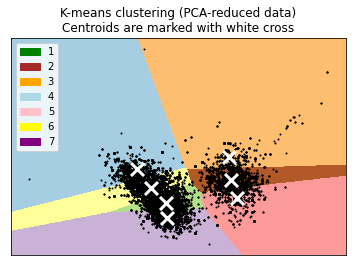

__________________________________________________________________________________

-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 2 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.09s	64141	0.026	0.102	0.042	0.011	0.042	0.563


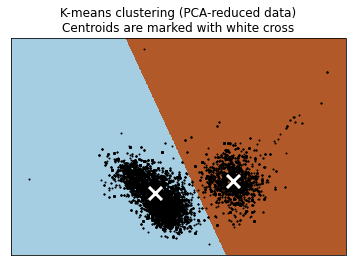

In [133]:
dataW = scale(wineX)

n_samplesW, n_featuresW = dataW.shape
n_digitsW = len(np.unique(wineY))
labelsW = wineY

sample_size = 300

print("Wine Data: ")
print("n_digitsW: %d, \t n_samples %d, \t n_features %d"
      % (n_digitsW, n_samplesW, n_featuresW))
print("Mushrooms Data: ")
print("n_digitsM: %d, \t n_samples %d, \t n_features %d"
      % (n_digitsM, n_samplesM, n_featuresM))

print(82 * '_')
print('\n-------------- Wine Dataset  -------------------')
print(82 * '_')
print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


digitW = n_digitsW
reduced_data0 = PCA(n_components=2).fit_transform(dataW)
kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10),
              name="k-means++", data=reduced_data0, labels=labelsW, sample_size=sample_size)
tempLabel = []
for label in kmeans.labels_:
    if label not in set(tempLabel):
        tempLabel.append(label)
print(tempLabel)

handle1 = [mpatches.Patch(color='green', label='1'), 
           mpatches.Patch(color='brown', label='2'), 
           mpatches.Patch(color='orange', label='3'), 
           mpatches.Patch(color='lightblue', label='4'), 
           mpatches.Patch(color='pink', label='5'), 
           mpatches.Patch(color='yellow', label='6'), 
           mpatches.Patch(color='purple', label='7')]

# Visualise
h = .02
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitW, kmeans)
PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle1)

print(82 * '_')

print('\n-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 2 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# elcan is more efficient but more memory intensive

sample_size = 300
digitW = 2
reduced_data = PCA(n_components=2).fit_transform(dataW)
kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10, algorithm='elkan')
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10, algorithm='elkan'),
              name="k-means++", data=reduced_data, labels=labelsW, sample_size=sample_size)

# Visualise
h = .02     
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data, digitW, kmeans)
PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, False, None)






__________________________________________________________________________________

-------------- Wine Dataset White Wine Only  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.24s	12810	0.084	0.085	0.085	0.046	0.084	0.418
[1, 2, 3, 0, 4, 5, 6]


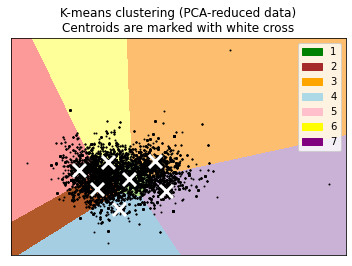

__________________________________________________________________________________

-------------- Wine Dataset Red Wine Only  -------------------
__________________________________________________________________________________
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.08s	3996	0.048	0.049	0.049	0.031	0.047	0.387
[2, 0, 4, 1, 5, 3]


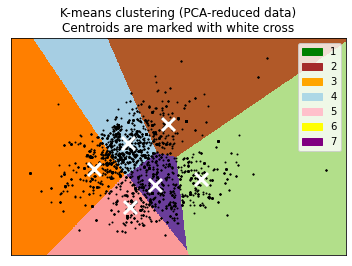

In [134]:
justWhite = wine[wine.type != 0]
wineY = justWhite['quality']
wineX = justWhite.drop('quality', axis=1)

dataW = scale(wineX)

n_samplesW, n_featuresW = dataW.shape
n_digitsW = len(np.unique(wineY))
labelsW = wineY

print(82 * '_')
print('\n-------------- Wine Dataset White Wine Only  -------------------')
print(82 * '_')
print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


digitW = n_digitsW
reduced_data0 = PCA(n_components=2).fit_transform(dataW)
kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10),
              name="k-means++", data=reduced_data0, labels=labelsW, sample_size=sample_size)
tempLabel = []
for label in kmeans.labels_:
    if label not in set(tempLabel):
        tempLabel.append(label)
print(tempLabel)

handle1 = [mpatches.Patch(color='green', label='1'), 
           mpatches.Patch(color='brown', label='2'), 
           mpatches.Patch(color='orange', label='3'), 
           mpatches.Patch(color='lightblue', label='4'), 
           mpatches.Patch(color='pink', label='5'), 
           mpatches.Patch(color='yellow', label='6'), 
           mpatches.Patch(color='purple', label='7')]

# Visualise
h = .02
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitW, kmeans)
PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle1)



justWhite = wine[wine.type != 1]
wineY = justWhite['quality']
wineX = justWhite.drop('quality', axis=1)

dataW = scale(wineX)

n_samplesW, n_featuresW = dataW.shape
n_digitsW = len(np.unique(wineY))
labelsW = wineY

print(82 * '_')
print('\n-------------- Wine Dataset Red Wine Only  -------------------')
print(82 * '_')
print(82 * '_')
print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


digitW = n_digitsW
reduced_data0 = PCA(n_components=2).fit_transform(dataW)
kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10),
              name="k-means++", data=reduced_data0, labels=labelsW, sample_size=sample_size)
tempLabel = []
for label in kmeans.labels_:
    if label not in set(tempLabel):
        tempLabel.append(label)
print(tempLabel)

handle1 = [mpatches.Patch(color='green', label='1'), 
           mpatches.Patch(color='brown', label='2'), 
           mpatches.Patch(color='orange', label='3'), 
           mpatches.Patch(color='lightblue', label='4'), 
           mpatches.Patch(color='pink', label='5'), 
           mpatches.Patch(color='yellow', label='6'), 
           mpatches.Patch(color='purple', label='7')]

# Visualise
h = .02
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitW, kmeans)
PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle1)

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 3 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.20s	13188	0.058	0.061	0.059	0.029	0.059	0.387
[0, 5, 4, 3, 1, 2]


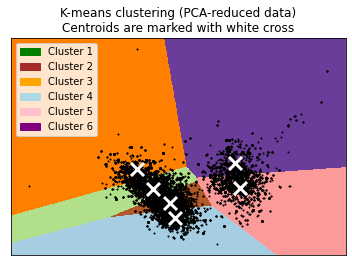

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 4 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.20s	12692	0.067	0.070	0.068	0.036	0.068	0.411
[3, 1, 4, 0, 2, 5]


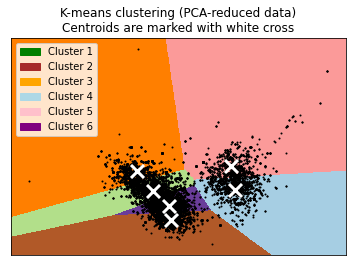

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 5 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.18s	12419	0.060	0.063	0.061	0.031	0.061	0.459
[1, 2, 4, 0, 5, 3]


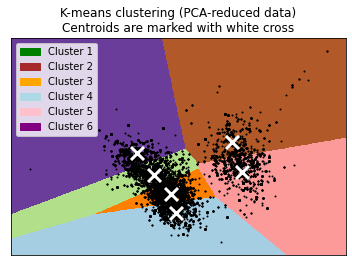

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 6 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.16s	12735	0.064	0.067	0.065	0.033	0.065	0.453
[4, 2, 0, 5, 3, 1]


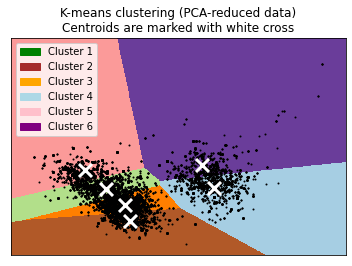

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 7 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.18s	12747	0.064	0.066	0.065	0.033	0.065	0.412
[3, 2, 4, 1, 5, 0]


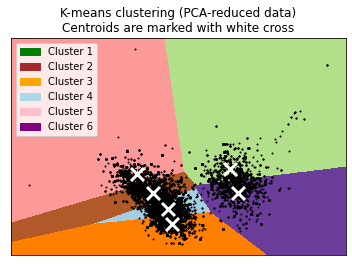

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 8 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.17s	12614	0.061	0.063	0.062	0.033	0.062	0.409
[0, 2, 3, 1, 5, 4]


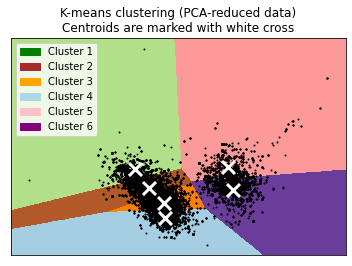

__________________________________________________________________________________

-------------- Wine Dataset, Quality = 9 Removed -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.23s	13631	0.017	0.017	0.017	0.010	0.016	0.360
[1, 2, 5, 0, 4, 3]


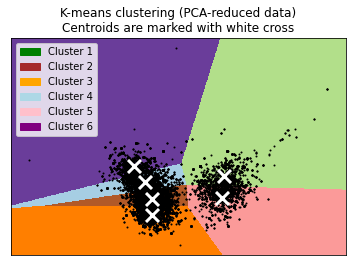

In [135]:
qualities = [3,4,5,6,7,8,9]

for qual in qualities:
    

    justWhite = wine[wine.quality != qual]
    wineY = justWhite['quality']
    wineX = justWhite.drop('quality', axis=1)

    dataW = scale(wineX)

    n_samplesW, n_featuresW = dataW.shape
    n_digitsW = len(np.unique(wineY))
    labelsW = wineY

    print(82 * '_')
    print('\n-------------- Wine Dataset, Quality = '+ str(qual) +' Removed -------------------')
    print(82 * '_')
    print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------')
    print(82 * '_')
    print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


    digitW = n_digitsW
    reduced_data0 = PCA(n_components=2).fit_transform(dataW)
    kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10)
    kmeans.fit(reduced_data0)


    bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10),
                  name="k-means++", data=reduced_data0, labels=labelsW, sample_size=sample_size)
    tempLabel = []
    for label in kmeans.labels_:
        if label not in set(tempLabel):
            tempLabel.append(label)
    print(tempLabel)

    handle1 = [mpatches.Patch(color='green', label='Cluster 1'), 
               mpatches.Patch(color='brown', label='Cluster 2'), 
               mpatches.Patch(color='orange', label='Cluster 3'), 
               mpatches.Patch(color='lightblue', label='Cluster 4'), 
               mpatches.Patch(color='pink', label='Cluster 5'), 
               mpatches.Patch(color='purple', label='Cluster 6')]

    # Visualise
    h = .02
    xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitW, kmeans)
    PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle1)

__________________________________________________________________________________

-------------- Wine Dataset, Only Quality 5 and 6 -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.03s	17028	0.013	0.015	0.014	0.013	0.014	0.547
[1, 0]


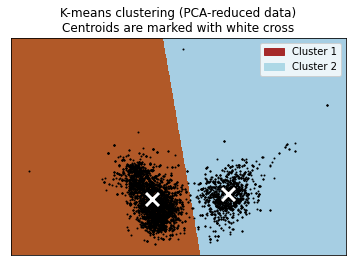

In [145]:
justWhite = wine[wine.quality == 5]
justWhite = justWhite.append(wine[wine.quality == 6])
wineY = justWhite['quality']
wineX = justWhite.drop('quality', axis=1)

dataW = scale(wineX)

n_samplesW, n_featuresW = dataW.shape
n_digitsW = len(np.unique(wineY))
labelsW = wineY

print(82 * '_')
print('\n-------------- Wine Dataset, Only Quality 5 and 6 -------------------')
print(82 * '_')
print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 7  -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


digitW = n_digitsW
reduced_data0 = PCA(n_components=2).fit_transform(dataW)
kmeans = KMeans(init='k-means++', n_clusters=digitW, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=digitW, n_init=10),
              name="k-means++", data=reduced_data0, labels=labelsW, sample_size=sample_size)
tempLabel = []
for label in kmeans.labels_:
    if label not in set(tempLabel):
        tempLabel.append(label)
print(tempLabel)

handle1 = [mpatches.Patch(color='brown', label='Cluster 1'),  
           mpatches.Patch(color='lightblue', label='Cluster 2')]

# Visualise
h = .02
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitW, kmeans)
PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle1)

# Mushrooms Dataset Model

__________________________________________________________________________________

-------------- Mushroom Dataset  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r=2, algorithm = auto, features = 2  -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.04s	79716	0.527	0.544	0.535	0.599	0.535	0.580


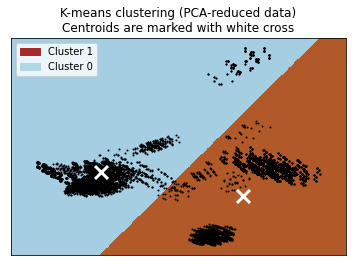

__________________________________________________________________________________

-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.12s	6039	0.569	0.232	0.330	0.257	0.330	0.619


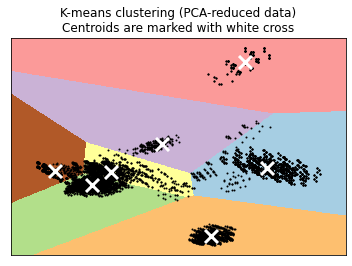

In [146]:
np.random.seed(42)
dataM = scale(mushroomX)
n_samplesM, n_featuresM = dataM.shape
n_digitsM = len(np.unique(mushroomY))
labelsM = mushroomY

sample_size = 300



print(82 * '_')
print('\n-------------- Mushroom Dataset  -------------------')
print(82 * '_')

print('\n-------------- Metrics after PCA with r=2, algorithm = auto, features = 2  -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


sample_size = 300
digitM = n_digitsM
reduced_data0 = PCA(n_components=2).fit_transform(dataM)
kmeans = KMeans(init='k-means++', n_clusters=digitM, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=digitM, n_init=10),
              name="k-means++", data=reduced_data0, labels=labelsM, sample_size=sample_size)

handle2 = [mpatches.Patch(color='brown', label='Cluster 1'), 
           mpatches.Patch(color='lightblue', label='Cluster 0')]

# Visualise
h = .02
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data0, digitM, kmeans)
PlotCluster(xx, yy, Z, reduced_data0, x_min, x_max, y_min, y_max, kmeans, True, handle2)

print(82 * '_')

print('\n-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# elcan is more efficient but more memory intensive

sample_size = 300
digitM = 7
reduced_data = PCA(n_components=2).fit_transform(dataM)
kmeans = KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan')
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan'),
              name="k-means++", data=reduced_data, labels=labelsM, sample_size=sample_size)

# Visualise
h = .02     
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data, digitM, kmeans)
PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, False, None)

class          0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 108, dtype: int64
__________________________________________________________________________________

-------------- Mushroom Dataset Normal  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.10s	6039	0.569	0.232	0.330	0.257	0.330	0.592


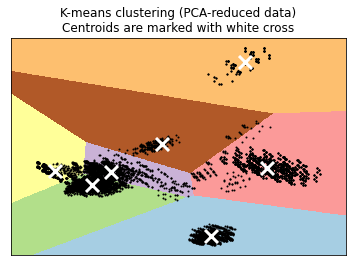

__________________________________________________________________________________

-------------- Mushroom Dataset Edible Only  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.06s	2131	1.000	0.000	0.000	0.000	-0.000	0.676


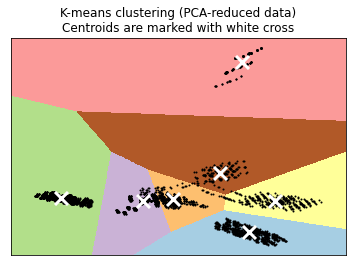

__________________________________________________________________________________

-------------- Mushroom Dataset Poisonous Only  -------------------
__________________________________________________________________________________

-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	2	0.07s	1865	1.000	0.000	0.000	0.000	0.000	0.580


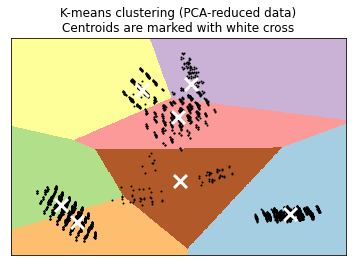

In [147]:
# Loads the datasets
mushrooms = pd.read_csv('newMushroom.csv')
print(mushrooms.isnull().sum())
mushroomY = mushrooms['class']
mushroomX = mushrooms.drop('class', axis=1)


np.random.seed(42)
dataM = scale(mushroomX)
n_samplesM, n_featuresM = dataM.shape
n_digitsM = len(np.unique(mushroomY))
labelsM = mushroomY

sample_size = 300


print(82 * '_')
print('\n-------------- Mushroom Dataset Normal  -------------------')
print(82 * '_')


print('\n-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# elcan is more efficient but more memory intensive


sample_size = 300
digitM = 7
reduced_data = PCA(n_components=2).fit_transform(dataM)
kmeans = KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan')
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan'),
              name="k-means++", data=reduced_data, labels=labelsM, sample_size=sample_size)

# Visualise
h = .02     
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data, digitM, kmeans)
PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, False, None)




print(82 * '_')
print('\n-------------- Mushroom Dataset Edible Only  -------------------')
print(82 * '_')


print('\n-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# elcan is more efficient but more memory intensive
# just edible mushrooms
# just edible mushrooms
justEdible = mushrooms[mushrooms['class'] == 0]
mushroomY = justEdible['class']
mushroomX = justEdible.drop('class', axis=1)

np.random.seed(42)
dataM = scale(mushroomX)
n_samplesM, n_featuresM = dataM.shape
n_digitsM = len(np.unique(mushroomY))
labelsM = mushroomY



sample_size = 300
digitM = 7
reduced_data = PCA(n_components=2).fit_transform(dataM)
kmeans = KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan')
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan'),
              name="k-means++", data=reduced_data, labels=labelsM, sample_size=sample_size)

# Visualise
h = .02     
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data, digitM, kmeans)
PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, False, None)



print(82 * '_')
print('\n-------------- Mushroom Dataset Poisonous Only  -------------------')
print(82 * '_')


print('\n-------------- Metrics after PCA with r = 2, algorithm = elkan, features = 7 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# elcan is more efficient but more memory intensive
# just poisonous mushrooms
justPoison = mushrooms[mushrooms['class'] == 1]
mushroomY = justPoison['class']
mushroomX = justPoison.drop('class', axis=1)

np.random.seed(42)
dataM = scale(mushroomX)
n_samplesM, n_featuresM = dataM.shape
n_digitsM = len(np.unique(mushroomY))
labelsM = mushroomY



sample_size = 300
digitM = 7
reduced_data = PCA(n_components=2).fit_transform(dataM)
kmeans = KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan')
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=digitM, n_init=10, algorithm='elkan'),
              name="k-means++", data=reduced_data, labels=labelsM, sample_size=sample_size)

# Visualise
h = .02     
xx, yy, Z, x_min, x_max, y_min, y_max = PrepClusters(h, reduced_data, digitM, kmeans)
PlotCluster(xx, yy, Z, reduced_data, x_min, x_max, y_min, y_max, kmeans, False, None)


